# Introduction to Time series

A **time series** is a sequence of data points recorded or measured at successive points in time, usually at uniform intervals. Time series analysis involves methods for analyzing these data points to extract meaningful statistics and identify characteristics of the data.

**Components of Time Series**
1. **Trend Component (T)**: Represents the general direction or pattern of the data over a long period.
2. **Seasonal Component (S)**: Captures the periodic fluctuations within a specific period (e.g., quarterly sales).
3. **Cyclic Component (C)**: Refers to long-term oscillations that are not necessarily periodic.
4. **Irregular Component (I)**: Random or residual variations after accounting for trend, seasonality, and cyclic components.

**Decomposition of Time Series**  
Time series can be decomposed into its components using either additive or multiplicative models:

* **Additive Model:**
Y(t)=T(t)+S(t)+C(t)+I(t)

 Data has same width and height of the seasonal patterns or peaks. Trend of the data is linear.

* **Multiplicative Model:**
Y(t)=T(t)×S(t)×C(t)×I(t)

 Data has increasing / decreasing width and height of the seasonal patterns or peaks. Trend of the data is non-linear.

# Information about dataset

We are using the data of transactions done using UPI, released by RBI.
[Link to dataset](https://www.rbi.org.in/Scripts/BS_PressReleaseDisplay.aspx?prid=49901#)

This dataset contain 3 columns :


1.   Date of transaction
2.   Volumne in lakhs
3.   Value in INR Crores



# Exploratory Data Analysis

In [117]:
pip install statsmodels

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [2]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

In [3]:
# Loading dataset
df = pd.read_csv("UPI transaction data.csv")

In [ ]:
# Let's see first 5 rows
df.head(5)

,Date,Vol,Val
0,"June 1, 2020",476.97,10413.11
1,"June 2, 2020",476.78,9951.30
2,"June 3, 2020",456.26,9622.38
3,"June 4, 2020",463.05,9639.50
4,"June 5, 2020",464.79,9539.52


In [ ]:
# Let's see last 5 rows
df.tail(5)

,Date,Vol,Val
1486,"June 26, 2024",4481.40,62349.06
1487,"June 27, 2024",4504.87,62009.24
1488,"June 28, 2024",4527.52,66808.91
1489,"June 29, 2024",4755.43,70499.43
1490,"June 30, 2024",4619.75,59293.86


In [4]:
# Converting date to pandas datetime
df['Date'] = pd.to_datetime(df['Date'])
# Now index will be Date
df.set_index('Date', inplace=True)

In [5]:
# Checking shape of dataset
df.shape

(1491, 2)

In [6]:
# Checking null values
df.isnull().sum()

,0
Vol,0
Val,0


In [7]:
# various statistical measures
df.describe()

,Vol,Val
count,1491.000000,1491.000000
mean,2160.439611,34927.247458
std,1266.795148,18632.921051
min,289.000000,4333.740000
25%,929.760000,18035.945000
50%,1972.090000,33487.990000
75%,3136.965000,48262.555000
max,4840.870000,84201.750000


In [8]:
# Plot of volume vs date
fig = px.line(df, x=df.index, y="Vol")
fig.show()

In [9]:
# Plot of value vs date
fig = px.line(df, x=df.index, y="Val")
fig.show()

In [10]:
# Barplot of volume vs year
df_year = df.groupby(df.index.year)['Vol'].sum()
fig = px.bar(df_year, x=df_year.index, y='Vol', title='Volume per Year')
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Volume'
)
fig.show()


In [11]:
# Barplot of value vs year
df_year = df.groupby(df.index.year)['Val'].sum()
fig = px.bar(df_year, x=df_year.index, y='Val', title='Value per Year')
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Value'
)
fig.show()

**Monthly** **data**

In [12]:
# Grouping by month and summing the 'Vol' column
df_monthly = df.resample('M').sum()

In [13]:
# Plotting with Plotly Express
df_monthly.index = df_monthly.index.strftime('%B %Y')
fig = px.line(df_monthly, x=df_monthly.index, y='Vol', title='Monthly Transaction Volume')
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Transaction Volume'
)
fig.show()


In [14]:
# Plotting with Plotly Express
fig = px.line(df_monthly, x=df_monthly.index, y='Val', title='Monthly Transaction Value')
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Transaction Value'
)
fig.show()

**Weekly data**

In [15]:
# Grouping by week and summing the 'Vol' column
df_weekly = df.resample('W').sum()

In [16]:
# Plotting with Plotly Express
fig = px.line(df_weekly, x=df_weekly.index, y='Vol', title='Weekly Transaction Volume')
fig.update_layout(
    xaxis_title='Week',
    yaxis_title='Transaction Volume'
)
fig.show()

In [17]:
# Plotting with Plotly Express
fig = px.line(df_weekly, x=df_weekly.index, y='Val', title='Weekly Transaction Value')
fig.update_layout(
    xaxis_title='Week',
    yaxis_title='Transaction Value'
)
fig.show()

**Let's find the period of Seasonality**

In [18]:
# Perform Fourier Transform
fft_vals = np.fft.fft(df['Vol'])
fft_freqs = np.fft.fftfreq(len(df))

# Only keep the positive frequencies
positive_freqs = fft_freqs[fft_freqs >= 0]
positive_vals = np.abs(fft_vals[fft_freqs >= 0])

fig = px.line(y= positive_vals, x=positive_freqs, title='Periodogram')
fig.update_layout(
    xaxis_title='Frequency',
    yaxis_title='Amplitude'
)
fig.show()


From the above we can see there is a peak at x = 0.032 which is equal to 1/Period. Therefore Seasonal Period of "Vol" data can be taken as 30.

In [19]:
# Perform Fourier Transform
fft_vals = np.fft.fft(df['Val'])
fft_freqs = np.fft.fftfreq(len(df))

# Only keep the positive frequencies
positive_freqs = fft_freqs[fft_freqs >= 0]
positive_vals = np.abs(fft_vals[fft_freqs >= 0])

fig = px.line(y= positive_vals, x=positive_freqs, title='Periodogram')
fig.update_layout(
    xaxis_title='Frequency',
    yaxis_title='Amplitude'
)
fig.show()

Again from the above we can see there is a peak at x = 0.032 which is equal to 1/Period. Therefore Seasonal Period of "Val" data can be taken as 30.

**Let's decompose our data to see Trend, Seasonality and Irregular components.**

In [20]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

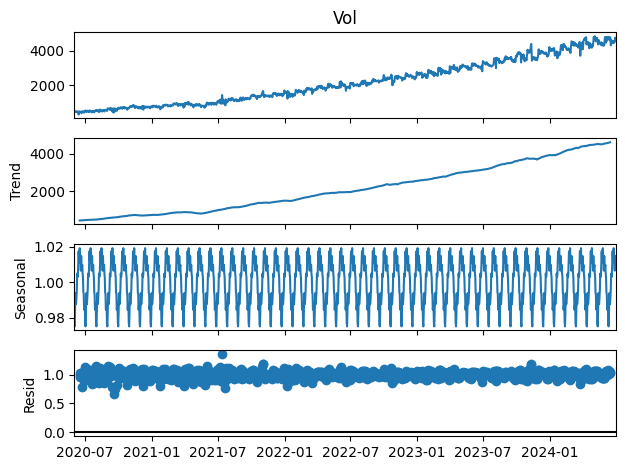

In [21]:
dec = sm.tsa.seasonal_decompose(df['Vol'],period = 30, model = 'multiplicative').plot()
plt.show()

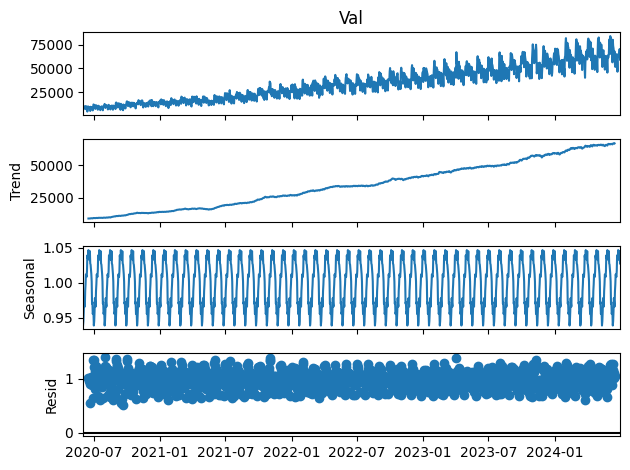

In [22]:
dec = sm.tsa.seasonal_decompose(df['Val'],period = 30, model = 'multiplicative').plot()
plt.show()

# Defining important functions

**Defining Dickey-Fuller test for Stationarity**

In [23]:
#Ho: It is non stationary
#H1: It is stationary
from statsmodels.tsa.stattools import adfuller

def adfuller_test(col):
    result=adfuller(col)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

For "Vol" data

In [24]:
adfuller_test(df['Vol'])

ADF Test Statistic : 1.9914203313883792
p-value : 0.9986616986026696
#Lags Used : 24
Number of Observations Used : 1466
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


For "Val" data

In [25]:
adfuller_test(df['Val'])

ADF Test Statistic : -0.3564569648359333
p-value : 0.917119001228093
#Lags Used : 24
Number of Observations Used : 1466
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


From test also it is now evident that data is not stationary. So we need to do differencing.

**Differencing (x_t - x_t-30)**

In [26]:
df['Vol_1st_diff'] = df['Vol'].diff(periods = 30)

adfuller_test(df['Vol_1st_diff'][30:])

ADF Test Statistic : -5.334530715757761
p-value : 4.642310952726284e-06
#Lags Used : 23
Number of Observations Used : 1437
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [27]:
df['Vol_1st_diff'][30:].head()

,Vol_1st_diff
Date,
2020-07-01,38.21
2020-07-02,5.18
2020-07-03,51.15
2020-07-04,35.72
2020-07-05,-32.27


In [28]:
fig = px.line(df, x=df.index, y="Vol_1st_diff")
fig.show()

In [29]:
df['Val_1st_diff'] = df['Val'].diff(periods = 30)

adfuller_test(df['Val_1st_diff'][30:])

ADF Test Statistic : -6.319466635884541
p-value : 3.091652806167665e-08
#Lags Used : 22
Number of Observations Used : 1438
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [30]:
df['Val_1st_diff'][30:].head()

,Val_1st_diff
Date,
2020-07-01,1198.60
2020-07-02,543.14
2020-07-03,1113.07
2020-07-04,475.08
2020-07-05,-2424.47


In [31]:
fig = px.line(df, x=df.index, y="Val_1st_diff")
fig.show()

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Model fitting

**ACF & PACF Plots for "Vol" and "Val" data**

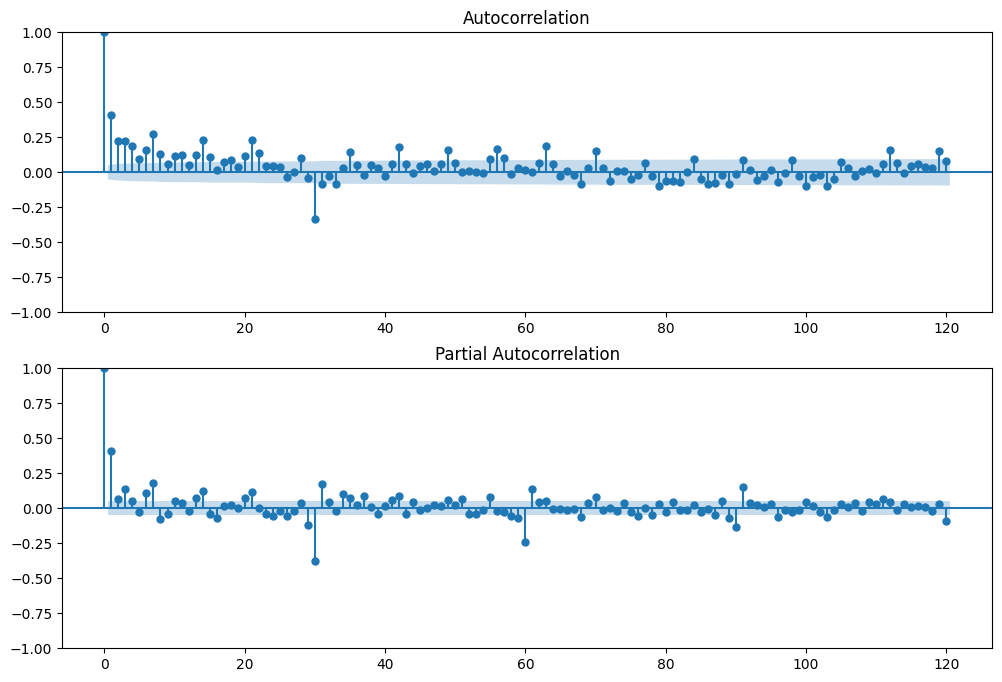

In [33]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Vol_1st_diff'].iloc[30:],lags=120,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Vol_1st_diff'].iloc[30:],lags=120,ax=ax2)

From the above ACF and PACF plots we can see that there is seasonal component also in the series. Also we see that ACF tends to 0 after 3rd or 4th lag in the beginning. It is showing spikes in the period of 30 in ACF and PACF.

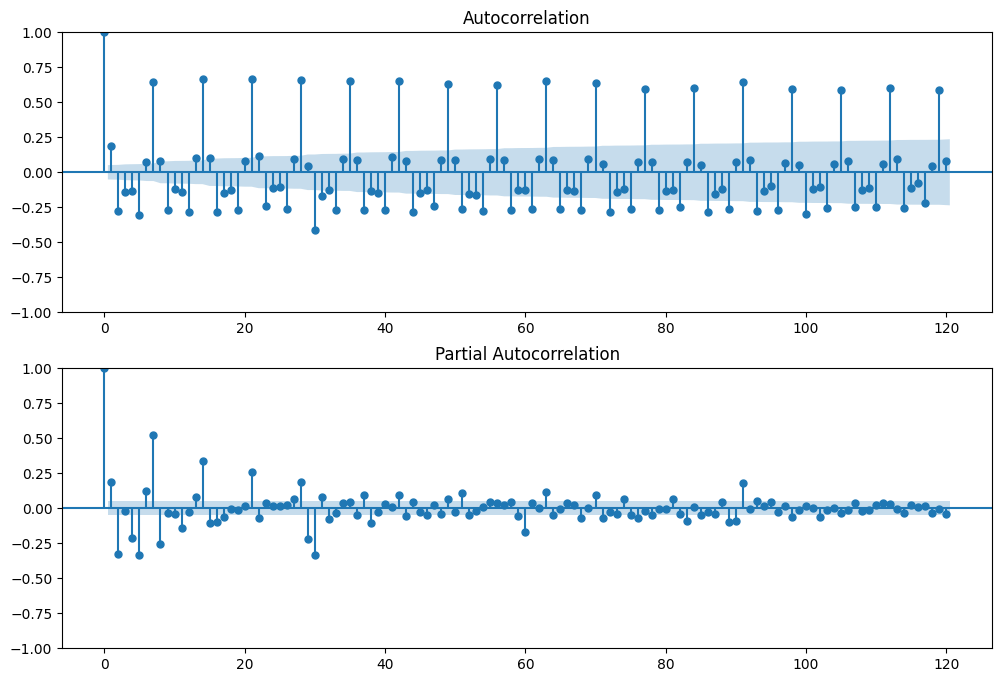

In [34]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Val_1st_diff'].iloc[30:],lags=120,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Val_1st_diff'].iloc[30:],lags=120,ax=ax2)

**Splitting Dataset**

In [35]:
# Split the data into train and test sets
train_size = int(len(df) * 0.8)
train_Vol, test_Vol = df['Vol'].iloc[:train_size], df['Vol'].iloc[train_size:]
train_Val, test_Val = df['Val'].iloc[:train_size], df['Val'].iloc[train_size:]

# **ARIMA(p,d,q)**

**For Volume**

In [36]:
# Fit ARIMA model
# (p, d, q) are the parameters of the ARIMA model. You can adjust these parameters or use auto_arima to determine the best parameters.
model = ARIMA(train_Vol, order=(3, 1, 1))
model_fit = model.fit()

In [37]:
# Print summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    Vol   No. Observations:                 1192
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -6861.000
Date:                Wed, 13 Aug 2025   AIC                          13731.999
Time:                        21:43:29   BIC                          13757.412
Sample:                    06-01-2020   HQIC                         13741.575
                         - 09-05-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4340      0.032     13.709      0.000       0.372       0.496
ar.L2          0.1709      0.031      5.519      0.000       0.110       0.232
ar.L3          0.0883      0.028      3.098      0.0

In [38]:
# Make predictions
predictions = model_fit.forecast(steps=len(test_Vol))
predictions = pd.Series(predictions, index=test_Vol.index)

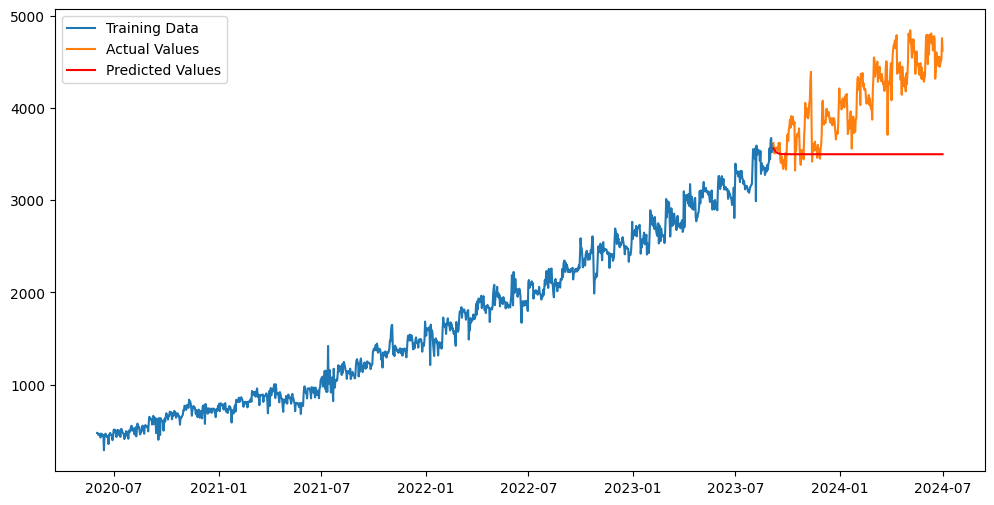

In [39]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_Vol, label='Training Data')
plt.plot(test_Vol, label='Actual Values')
plt.plot(predictions, label='Predicted Values', color='red')
plt.legend()
plt.show()

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.9 MB/s eta 0:00:00


**For Value**

In [40]:
# Fit ARIMA model
# (p, d, q) are the parameters of the ARIMA model. You can adjust these parameters or use auto_arima to determine the best parameters.
model = ARIMA(train_Val, order=(2, 1, 1))
model_fit = model.fit()

In [41]:
# Print summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    Val   No. Observations:                 1192
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -11685.321
Date:                Wed, 13 Aug 2025   AIC                          23378.642
Time:                        21:43:49   BIC                          23398.972
Sample:                    06-01-2020   HQIC                         23386.303
                         - 09-05-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3456      0.022     15.409      0.000       0.302       0.390
ar.L2          0.1331      0.030      4.412      0.000       0.074       0.192
ma.L1         -0.9612      0.011    -90.940      0.0

In [43]:
# Make predictions
predictions = model_fit.forecast(steps=len(test_Val))
predictions = pd.Series(predictions, index=test_Val.index)

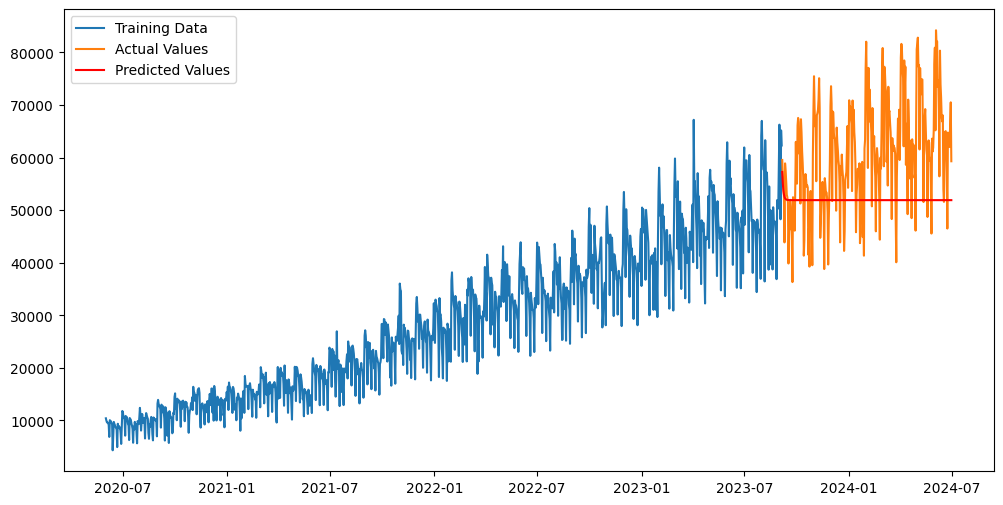

In [44]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_Val, label='Training Data')
plt.plot(test_Val, label='Actual Values')
plt.plot(predictions, label='Predicted Values', color='red')
plt.legend()
plt.show()

# **SARIMA(p,d,q)*(P,D,Q,S)**

**For Volume**

In [45]:
# Fit SARIMA model
# (p, d, q) are the parameters for the non-seasonal part of the model.
# (P, D, Q, s) are the parameters for the seasonal part of the model.
# 's' is the periodicity of the seasonality (e.g., 7 for weekly, 12 for monthly).
# We can adjust these parameters or use auto_arima to determine the best parameters.
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [46]:
model = SARIMAX(train_Vol, order=(2, 0, 3), seasonal_order=(3, 1, 1, 30))
model_fit = model.fit(disp=False)

# Forecast and get predictions for the training data to get residuals
train_predictions = model_fit.fittedvalues
residuals = train_Vol - train_predictions

# Print summary of the model
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                  Vol   No. Observations:                 1192
Model:             SARIMAX(2, 0, 3)x(3, 1, [1], 30)   Log Likelihood               -6693.202
Date:                              Wed, 13 Aug 2025   AIC                          13406.405
Time:                                      21:59:17   BIC                          13456.984
Sample:                                  06-01-2020   HQIC                         13425.488
                                       - 09-05-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0142      0.006      2.199      0.028       0.002       0.027
ar.L2          0.98

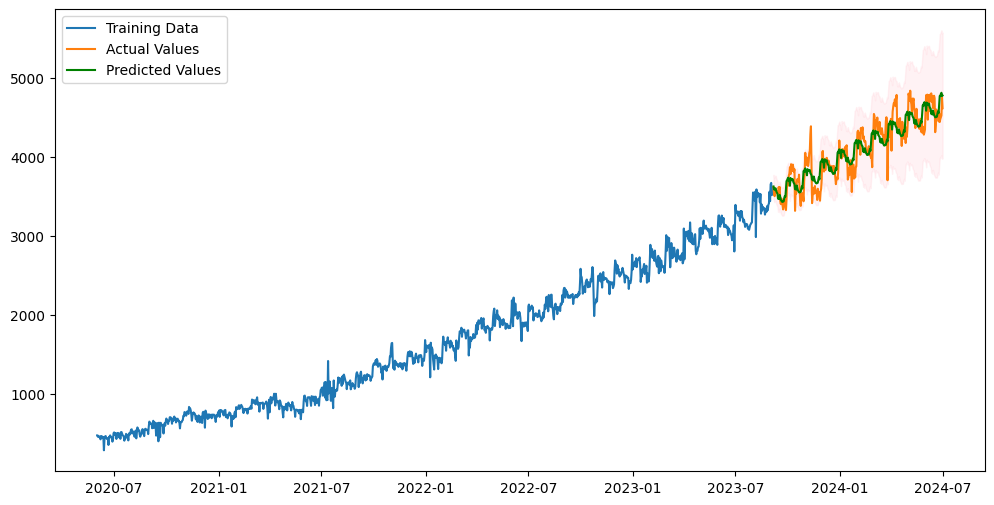

In [47]:
# Make predictions
predictions = model_fit.get_forecast(steps=len(test_Vol))
predicted_mean = predictions.predicted_mean
conf_int = predictions.conf_int()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_Vol, label='Training Data')
plt.plot(test_Vol, label='Actual Values')
plt.plot(predicted_mean, label='Predicted Values', color='green')
plt.fill_between(predicted_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend()
plt.show()

**Residual Analysis**

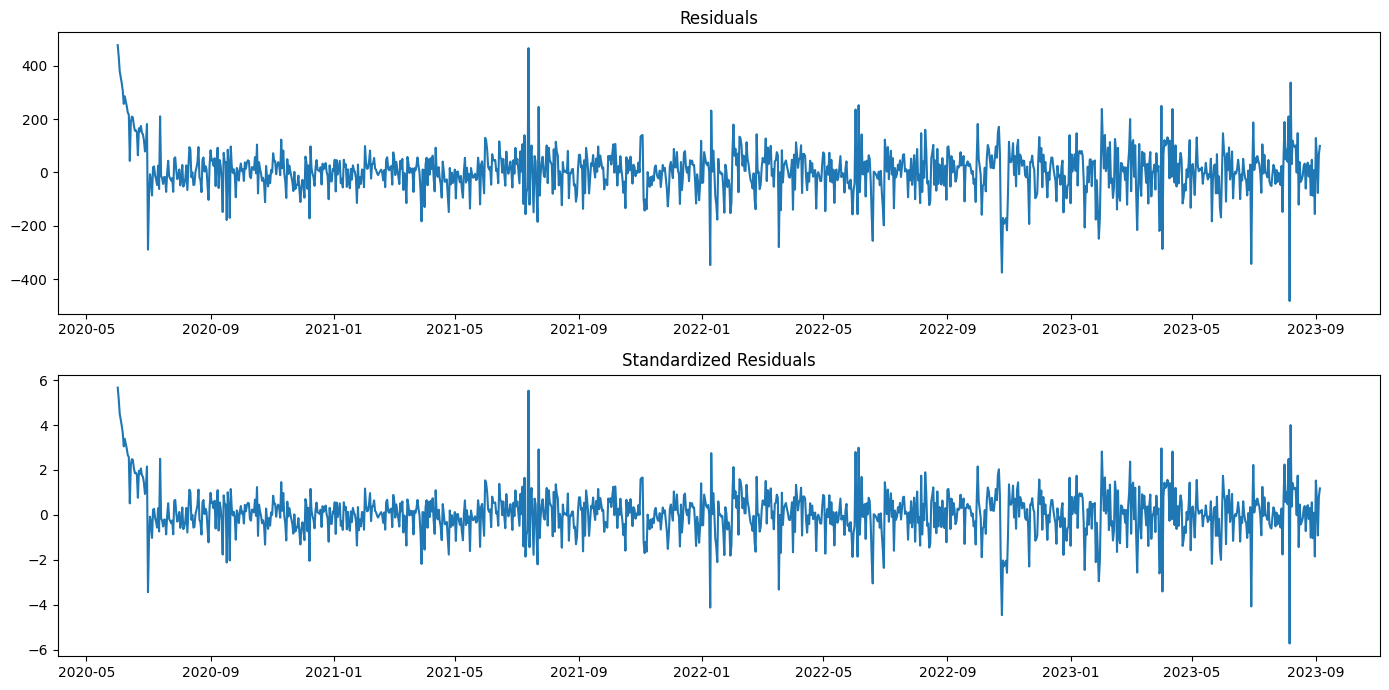

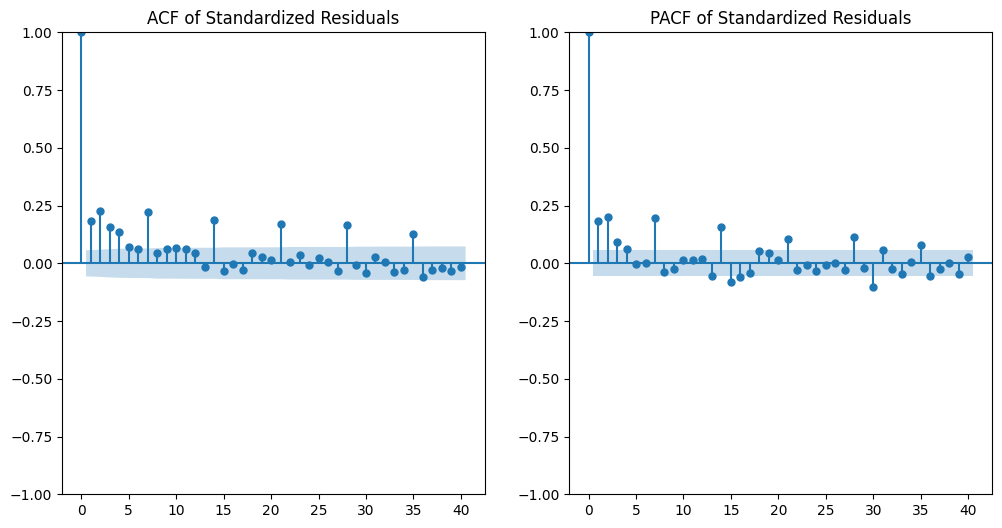

Ljung-Box test result:
       lb_stat     lb_pvalue
10  234.608493  9.276655e-45
Reject the null hypothesis: Residuals are not independently distributed.


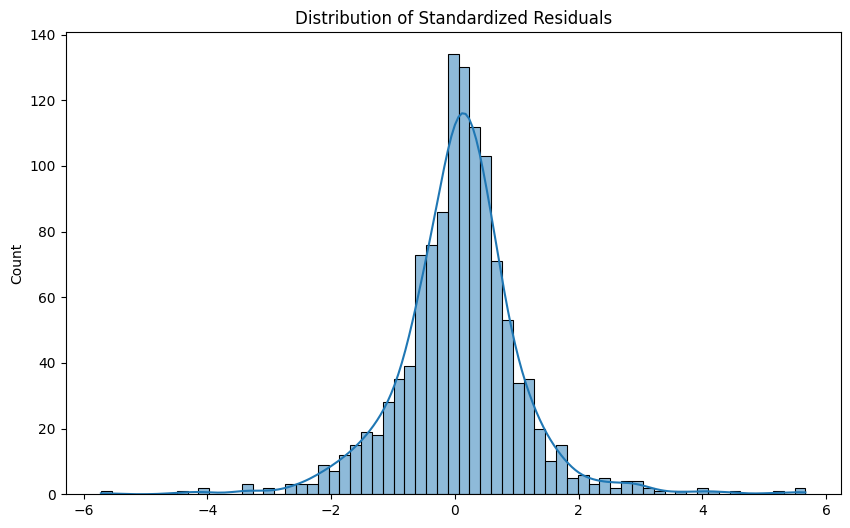

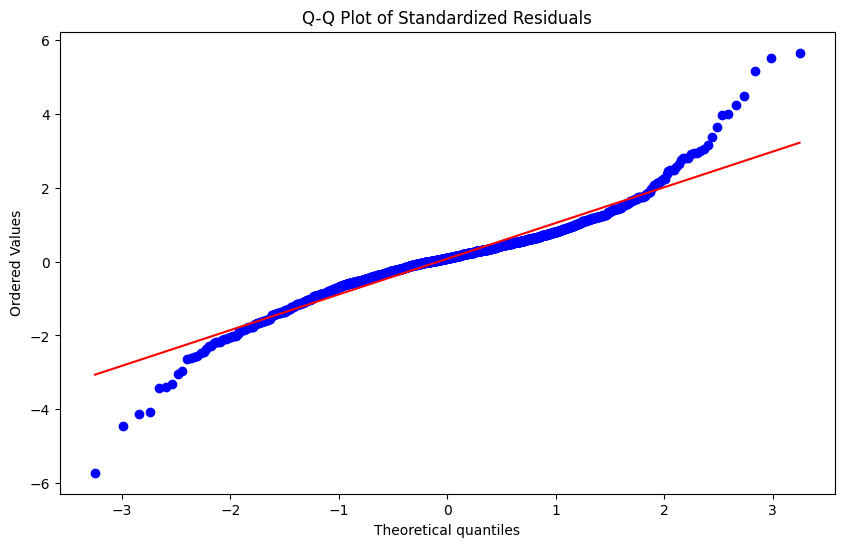

In [48]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats

# Residuals
residuals = model_fit.resid
standardized_residuals = residuals / np.std(residuals)

# Plot the residuals and standardized residuals
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(residuals)
plt.title('Residuals')

plt.subplot(2, 1, 2)
plt.plot(standardized_residuals)
plt.title('Standardized Residuals')

plt.tight_layout()
plt.show()

# Plot ACF and PACF of standardized residuals
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(standardized_residuals, ax=plt.gca(), lags=40)
plt.title('ACF of Standardized Residuals')
plt.subplot(122)
plot_pacf(standardized_residuals, ax=plt.gca(), lags=40)
plt.title('PACF of Standardized Residuals')
plt.show()

# Perform Ljung-Box test
ljung_box_result = acorr_ljungbox(standardized_residuals, lags=[10], return_df=True)
print("Ljung-Box test result:")
print(ljung_box_result)

# Interpretation
if ljung_box_result['lb_pvalue'].values[0] > 0.05:
    print("Fail to reject the null hypothesis: Residuals are independently distributed.")
else:
    print("Reject the null hypothesis: Residuals are not independently distributed.")

# Plot the distribution of the standardized residuals
plt.figure(figsize=(10, 6))
sns.histplot(standardized_residuals, kde=True)
plt.title('Distribution of Standardized Residuals')
plt.show()

# Plot Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Standardized Residuals')
plt.show()

**For Value**

In [49]:
model = SARIMAX(train_Val, order=(2, 0, 2), seasonal_order=(1, 1, 1, 30))
model_fit = model.fit(disp=False)

# Forecast and get predictions for the training data to get residuals
train_predictions = model_fit.fittedvalues
residuals = train_Val - train_predictions

# Print summary of the model
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                  Val   No. Observations:                 1192
Model:             SARIMAX(2, 0, 2)x(1, 1, [1], 30)   Log Likelihood              -11390.790
Date:                              Wed, 13 Aug 2025   AIC                          22795.579
Time:                                      22:01:40   BIC                          22830.985
Sample:                                  06-01-2020   HQIC                         22808.937
                                       - 09-05-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4883      0.045     10.876      0.000       0.400       0.576
ar.L2          0.51

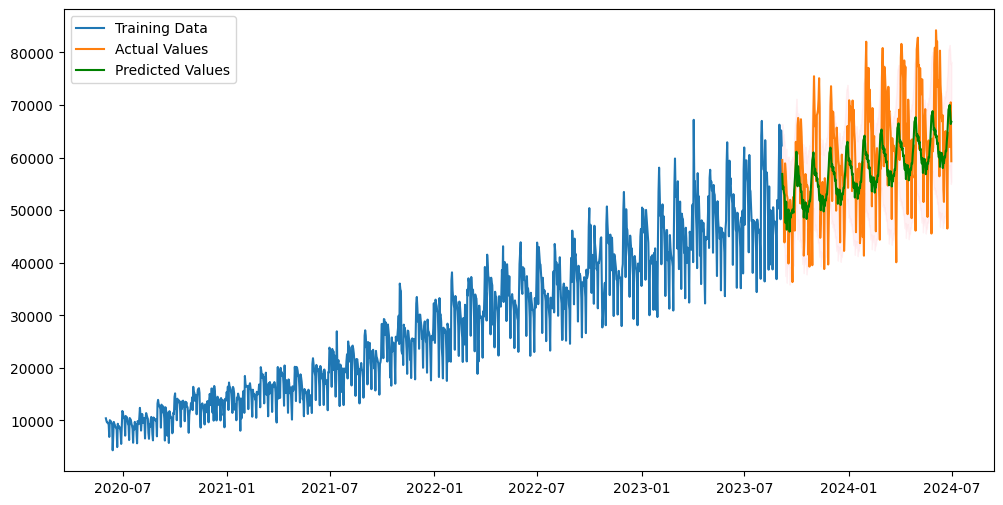

In [50]:
# Make predictions
predictions = model_fit.get_forecast(steps=len(test_Val))
predicted_mean = predictions.predicted_mean
conf_int = predictions.conf_int()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_Val, label='Training Data')
plt.plot(test_Val, label='Actual Values')
plt.plot(predicted_mean, label='Predicted Values', color='green')
plt.fill_between(predicted_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend()
plt.show()

# Residual Analysis

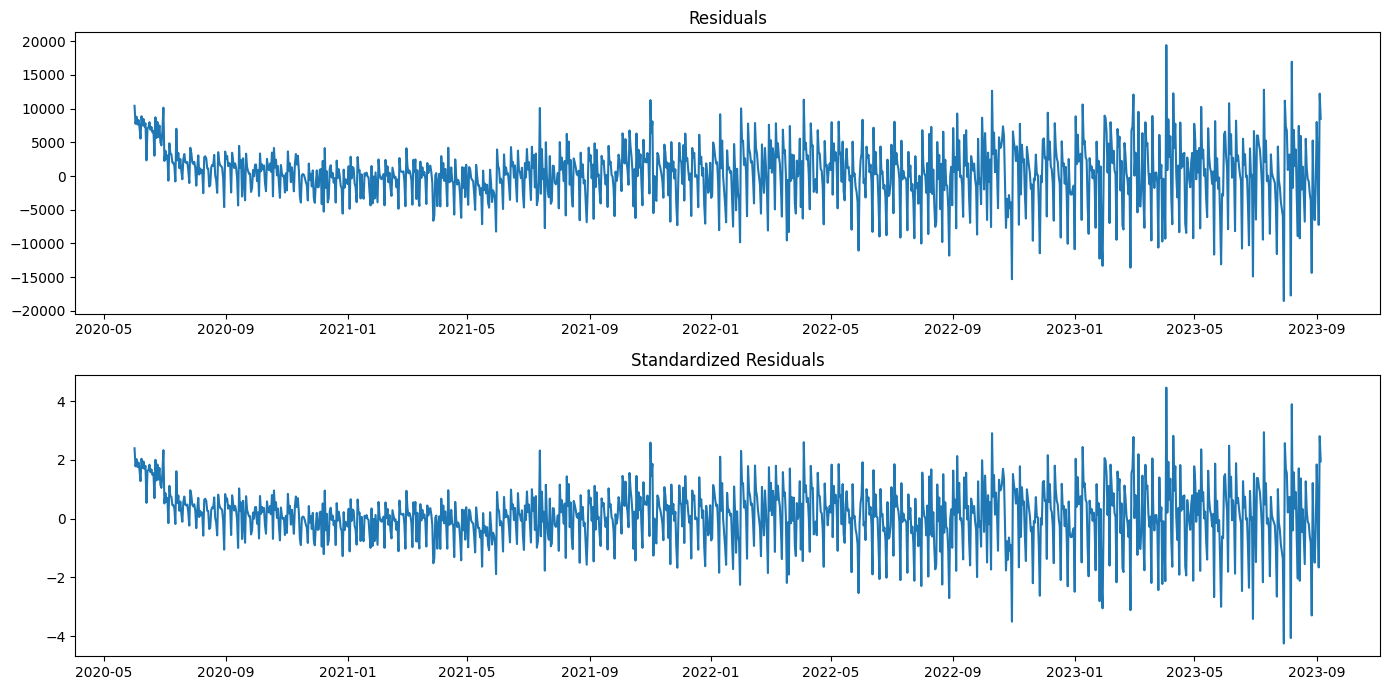

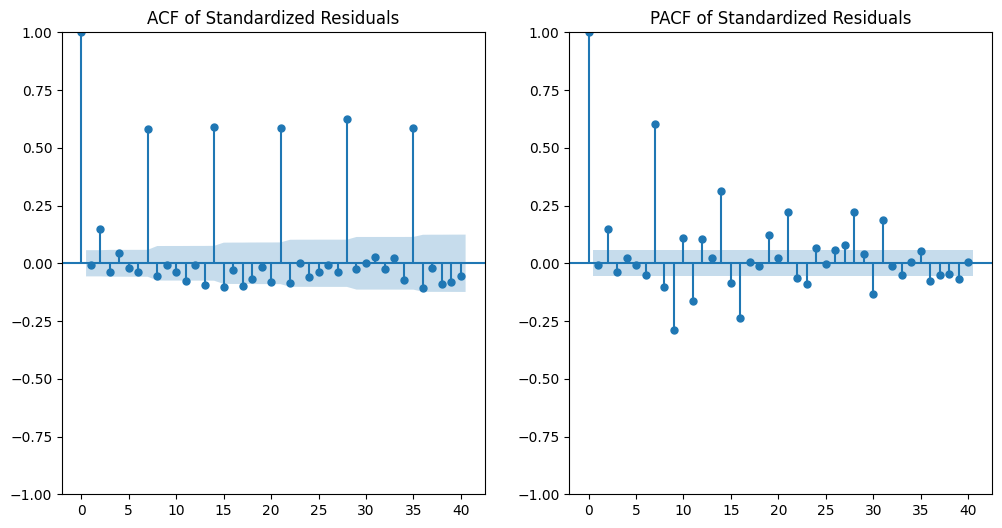

Ljung-Box test result:
      lb_stat     lb_pvalue
10  444.76559  2.731614e-89
Reject the null hypothesis: Residuals are not independently distributed.


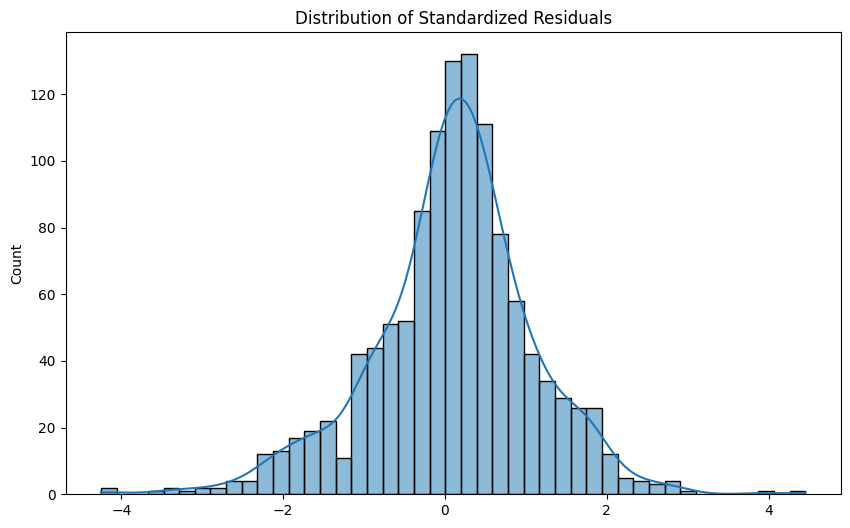

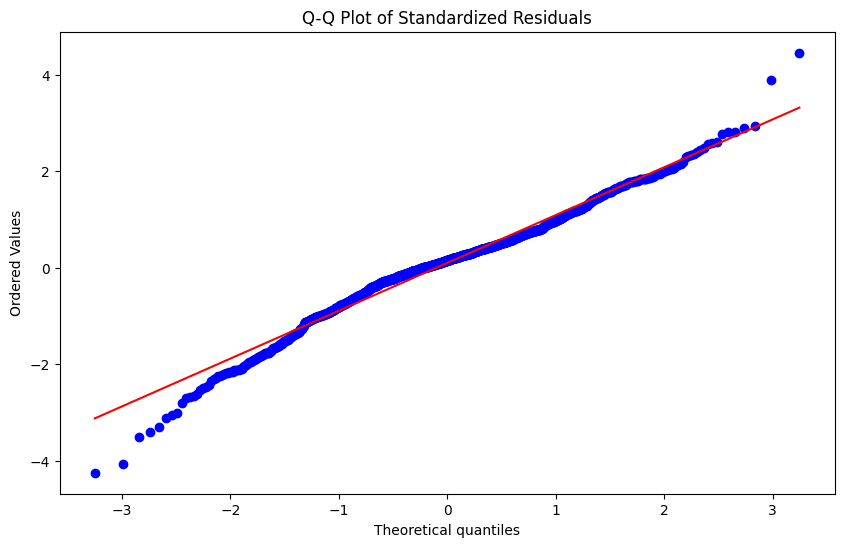

In [51]:
# Residuals
residuals = model_fit.resid
standardized_residuals = residuals / np.std(residuals)

# Plot the residuals and standardized residuals
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(residuals)
plt.title('Residuals')

plt.subplot(2, 1, 2)
plt.plot(standardized_residuals)
plt.title('Standardized Residuals')

plt.tight_layout()
plt.show()

# Plot ACF and PACF of standardized residuals
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(standardized_residuals, ax=plt.gca(), lags=40)
plt.title('ACF of Standardized Residuals')
plt.subplot(122)
plot_pacf(standardized_residuals, ax=plt.gca(), lags=40)
plt.title('PACF of Standardized Residuals')
plt.show()

# Perform Ljung-Box test
ljung_box_result = acorr_ljungbox(standardized_residuals, lags=[10], return_df=True)
print("Ljung-Box test result:")
print(ljung_box_result)

# Interpretation
if ljung_box_result['lb_pvalue'].values[0] > 0.05:
    print("Fail to reject the null hypothesis: Residuals are independently distributed.")
else:
    print("Reject the null hypothesis: Residuals are not independently distributed.")

# Plot the distribution of the standardized residuals
plt.figure(figsize=(10, 6))
sns.histplot(standardized_residuals, kde=True)
plt.title('Distribution of Standardized Residuals')
plt.show()

# Plot Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Standardized Residuals')
plt.show()

# Conclusion of ARIMA & SARIMA models on our Time Series data

This project involved a **comprehensive time series analysis** of UPI transaction data (Volume and Value). We began by exploring the dataset, identifying its key components, and performing exploratory data analysis to understand trends and seasonality. We visualized the data over time, by year, month, and week, revealing clear upward trends and potential seasonal patterns.

To confirm **seasonality**, we employed Fourier Transforms, which strongly indicated a seasonal period of approximately 30 days for both volume and value data. Based on this finding, we decomposed the time series using a multiplicative model to further visualize the trend, seasonality and irregular components.

Recognizing that the data was **non-stationary** (confirmed by the Augmented Dickey-Fuller test), we applied a 30-day difference to achieve stationarity. We then used ACF and PACF plots of the differenced series to guide the selection of parameters for our forecasting models.

We experimented with both ARIMA and SARIMA models to forecast future UPI transaction volumes and values. While the **ARIMA model captured some of the trend, but it struggled to capture the pronounced seasonality** and the increasing amplitude of the seasonal fluctuations, leading to predictions that were notably flatter than the actual data in the long run. It has underperformed mainly because it can’t directly model seasonality, causing over-differenced data to lose trends and flatten forecasts. The **SARIMA model,on the other hand, incorporating the identified seasonality, provided a better fit and more accurate predictions**, as evidenced by the plots showing actual versus predicted values, because it explicitly models both the non-seasonal and seasonal components of the time series.

Finally, we performed rigorous **residual analysis** on the SARIMA models. Plots of residuals and standardized residuals, along with ACF/PACF plots of residuals, the Ljung-Box test, distribution plots, and Q-Q plots, allowed us to assess the model's goodness of fit and determine if the residuals were independently and normally distributed. The **residual analysis confirmed that the SARIMA model provided a reasonable representation of the underlying data generating process**.

Overall, this project successfully demonstrated the application of time series analysis techniques to real-world financial data. **The SARIMA models developed offer a valuable tool for forecasting future UPI transaction activity, which could be beneficial for various purposes, such as capacity planning, risk assessment, and strategic decision-making**. Future work could involve exploring other time series models, incorporating external factors, or further refining model parameters to potentially improve forecasting accuracy.

# Implementing Neural Networks (RNN, LSTM and GRU)
Now we implement and compare the performance of Simple RNN, LSTM and GRU models with traditional ARIMA and SARIMA models for time series forecasting.

## Data preparation for neural networks
We have to prepare the time series data for use with LSTM and GRU models by scaling the data and creating sequences.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Reshape and scale 'Vol' and 'Val' data
scaler = MinMaxScaler()
scaled_vol = scaler.fit_transform(df['Vol'].values.reshape(-1, 1))
scaled_val = scaler.fit_transform(df['Val'].values.reshape(-1, 1))


Define a function to create time series sequences and apply it to the scaled data, then split the data into training and testing sets.



In [ ]:
def create_sequences(data, time_step):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# Define the time step
time_step = 30

# Create sequences for 'Vol' and 'Val'
X_vol, Y_vol = create_sequences(scaled_vol, time_step)
X_val, Y_val = create_sequences(scaled_val, time_step)

# Split data into training and testing sets (80/20 split)
train_size = int(len(X_vol) * 0.8)

X_train_vol, X_test_vol = X_vol[:train_size], X_vol[train_size:]
Y_train_vol, Y_test_vol = Y_vol[:train_size], Y_vol[train_size:]

X_train_val, X_test_val = X_val[:train_size], X_val[train_size:]
Y_train_val, Y_test_val = Y_val[:train_size], Y_val[train_size:]


Reshape the training and testing input data to be 3D arrays for use with LSTM and GRU models.



In [ ]:
# Reshape input data for LSTM/GRU [samples, time_step, features]
X_train_vol = X_train_vol.reshape(X_train_vol.shape[0], X_train_vol.shape[1], 1)
X_test_vol = X_test_vol.reshape(X_test_vol.shape[0], X_test_vol.shape[1], 1)

X_train_val = X_train_val.reshape(X_train_val.shape[0], X_train_val.shape[1], 1)
X_test_val = X_test_val.reshape(X_test_val.shape[0], X_test_val.shape[1], 1)

## Build and train lstm model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Define the LSTM model for 'Vol'
model_lstm_vol = Sequential()
model_lstm_vol.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm_vol.add(Dropout(0.2))
model_lstm_vol.add(LSTM(units=50))
model_lstm_vol.add(Dropout(0.2))
model_lstm_vol.add(Dense(units=1))

# Compile the model
model_lstm_vol.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_lstm_vol = model_lstm_vol.fit(X_train_vol, Y_train_vol, epochs=50, batch_size=32, validation_data=(X_test_vol, Y_test_vol), verbose=1)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0374 - val_loss: 0.0052
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0015 - val_loss: 0.0037
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.

In [ ]:
# Define the LSTM model for 'Val'
model_lstm_val = Sequential()
model_lstm_val.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm_val.add(Dropout(0.2))
model_lstm_val.add(LSTM(units=50))
model_lstm_val.add(Dropout(0.2))
model_lstm_val.add(Dense(units=1))

# Compile the model
model_lstm_val.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_lstm_val = model_lstm_val.fit(X_train_val, Y_train_val, epochs=50, batch_size=32, validation_data=(X_test_val, Y_test_val), verbose=1)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0233 - val_loss: 0.0235
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0056 - val_loss: 0.0173
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0058 - val_loss: 0.0207
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0058 - val_loss: 0.0156
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0051 - val_loss: 0.0161
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0049 - val_loss: 0.0164
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0046 - val_loss: 0.0145
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 0.0046 - val_loss: 0.0148
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0050 - val_loss: 0.0135
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0047 - val_loss: 0.0158
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0047 - val_loss: 0.0138
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0

## Make predictions with lstm



Use the trained LSTM models to make predictions on the test sets and then invert the scaling for both the predictions and the actual test values. Finally, print the shapes to confirm the unscaled data is ready for evaluation and visualization.



In [ ]:
# Make predictions on the test set
lstm_predictions_vol = model_lstm_vol.predict(X_test_vol)
lstm_predictions_val = model_lstm_val.predict(X_test_val)

# Invert the scaling for the predictions
lstm_predictions_vol_unscaled = scaler.inverse_transform(lstm_predictions_vol)
lstm_predictions_val_unscaled = scaler.inverse_transform(lstm_predictions_val)

# Invert the scaling for the actual test values
Y_test_vol_unscaled = scaler.inverse_transform(Y_test_vol.reshape(-1, 1))
Y_test_val_unscaled = scaler.inverse_transform(Y_test_val.reshape(-1, 1))

# Print the shapes of the unscaled predictions and actual values
print("Shape of unscaled 'Vol' predictions:", lstm_predictions_vol_unscaled.shape)
print("Shape of unscaled 'Val' predictions:", lstm_predictions_val_unscaled.shape)
print("Shape of unscaled 'Vol' actual values:", Y_test_vol_unscaled.shape)
print("Shape of unscaled 'Val' actual values:", Y_test_val_unscaled.shape)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
Shape of unscaled 'Vol' predictions: (293, 1)
Shape of unscaled 'Val' predictions: (293, 1)
Shape of unscaled 'Vol' actual values: (293, 1)
Shape of unscaled 'Val' actual values: (293, 1)


## Evaluate lstm model




We evaluate the performance of the LSTM model for both 'Vol' and 'Val' using MSE, RMSE and MAE and visualize the predictions against actual values.



LSTM Model Performance for 'Vol':
  Mean Squared Error (MSE): 20374123.67
  Root Mean Squared Error (RMSE): 4513.77
  Mean Absolute Error (MAE): 3686.46

LSTM Model Performance for 'Val':
  Mean Squared Error (MSE): 79061908.91
  Root Mean Squared Error (RMSE): 8891.68
  Mean Absolute Error (MAE): 7718.33


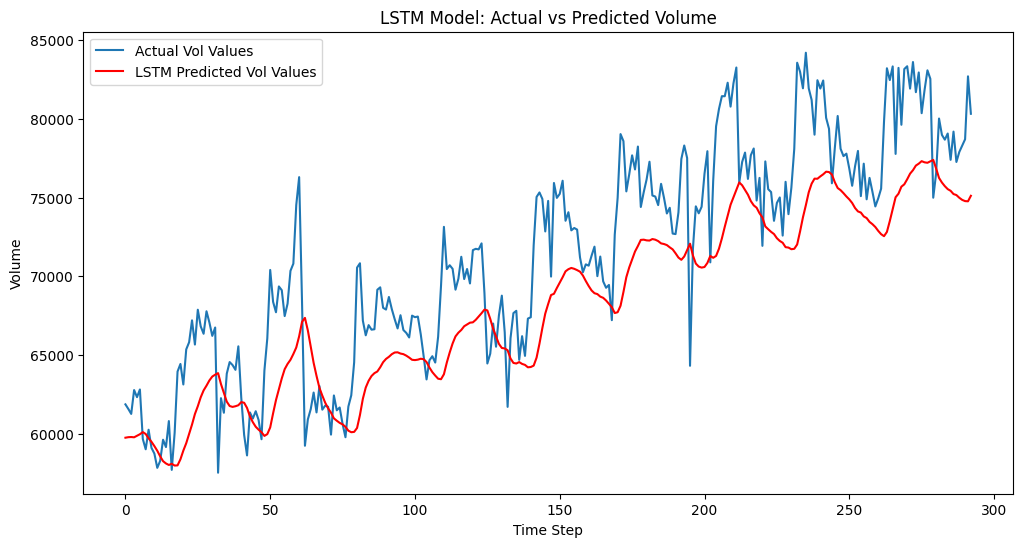

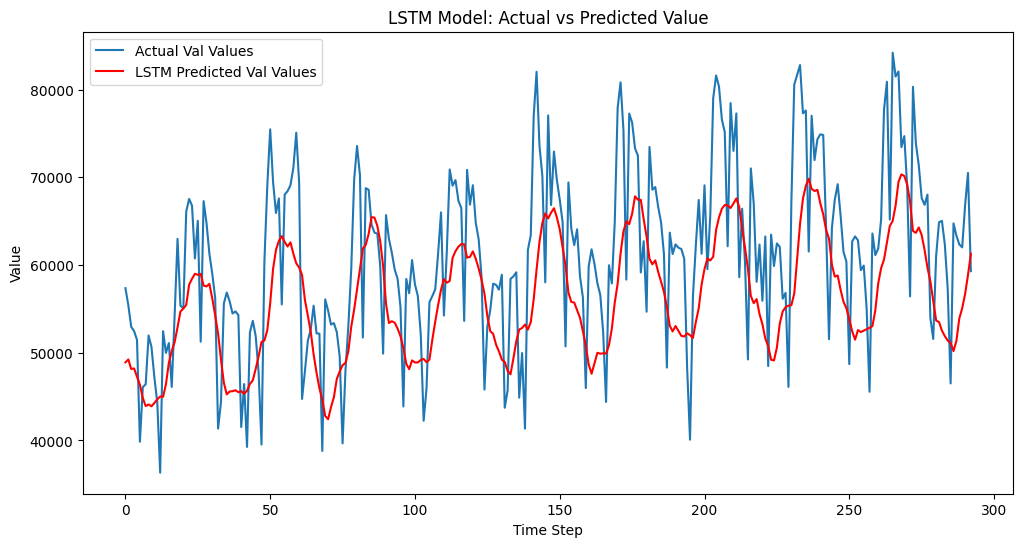

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Calculate MSE, RMSE, and MAE for 'Vol'
mse_vol = mean_squared_error(Y_test_vol_unscaled, lstm_predictions_vol_unscaled)
rmse_vol = np.sqrt(mse_vol)
mae_vol = mean_absolute_error(Y_test_vol_unscaled, lstm_predictions_vol_unscaled)

print(f"LSTM Model Performance for 'Vol':")
print(f"  Mean Squared Error (MSE): {mse_vol:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_vol:.2f}")
print(f"  Mean Absolute Error (MAE): {mae_vol:.2f}")

# Calculate MSE, RMSE, and MAE for 'Val'
mse_val = mean_squared_error(Y_test_val_unscaled, lstm_predictions_val_unscaled)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(Y_test_val_unscaled, lstm_predictions_val_unscaled)

print(f"\nLSTM Model Performance for 'Val':")
print(f"  Mean Squared Error (MSE): {mse_val:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_val:.2f}")
print(f"  Mean Absolute Error (MAE): {mae_val:.2f}")

# Plot actual vs predicted values for 'Vol'
plt.figure(figsize=(12, 6))
plt.plot(Y_test_vol_unscaled, label='Actual Vol Values')
plt.plot(lstm_predictions_vol_unscaled, label='LSTM Predicted Vol Values', color='red')
plt.title('LSTM Model: Actual vs Predicted Volume')
plt.xlabel('Time Step')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Plot actual vs predicted values for 'Val'
plt.figure(figsize=(12, 6))
plt.plot(Y_test_val_unscaled, label='Actual Val Values')
plt.plot(lstm_predictions_val_unscaled, label='LSTM Predicted Val Values', color='red')
plt.title('LSTM Model: Actual vs Predicted Value')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()

## Build and train gru model




In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense

# Define the GRU model for 'Vol'
model_gru_vol = Sequential()
model_gru_vol.add(GRU(units=50, return_sequences=True, input_shape=(time_step, 1)))
model_gru_vol.add(Dropout(0.2))
model_gru_vol.add(GRU(units=50))
model_gru_vol.add(Dropout(0.2))
model_gru_vol.add(Dense(units=1))

# Compile the model for 'Vol'
model_gru_vol.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for 'Vol'
history_gru_vol = model_gru_vol.fit(X_train_vol, Y_train_vol, epochs=50, batch_size=32, validation_data=(X_test_vol, Y_test_vol), verbose=1)

# Define the GRU model for 'Val'
model_gru_val = Sequential()
model_gru_val.add(GRU(units=50, return_sequences=True, input_shape=(time_step, 1)))
model_gru_val.add(Dropout(0.2))
model_gru_val.add(GRU(units=50))
model_gru_val.add(Dropout(0.2))
model_gru_val.add(Dense(units=1))

# Compile the model for 'Val'
model_gru_val.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for 'Val'
history_gru_val = model_gru_val.fit(X_train_val, Y_train_val, epochs=50, batch_size=32, validation_data=(X_test_val, Y_test_val), verbose=1)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - loss: 0.0359 - val_loss: 0.0017
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0

## Make predictions with GRU


Use the trained GRU models to make predictions on the test sets and then invert the scaling for both predictions and actual values. Finally, print the shapes to verify the results.



In [ ]:
# Make predictions on the test set
gru_predictions_vol = model_gru_vol.predict(X_test_vol)
gru_predictions_val = model_gru_val.predict(X_test_val)

# Invert the scaling for the predictions
gru_predictions_vol_unscaled = scaler.inverse_transform(gru_predictions_vol)
gru_predictions_val_unscaled = scaler.inverse_transform(gru_predictions_val)

# Invert the scaling for the actual test values
Y_test_vol_unscaled_gru = scaler.inverse_transform(Y_test_vol.reshape(-1, 1))
Y_test_val_unscaled_gru = scaler.inverse_transform(Y_test_val.reshape(-1, 1))

# Print the shapes of the unscaled predictions and actual values
print("Shape of unscaled 'Vol' GRU predictions:", gru_predictions_vol_unscaled.shape)
print("Shape of unscaled 'Val' GRU predictions:", gru_predictions_val_unscaled.shape)
print("Shape of unscaled 'Vol' actual values:", Y_test_vol_unscaled_gru.shape)
print("Shape of unscaled 'Val' actual values:", Y_test_val_unscaled_gru.shape)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step
Shape of unscaled 'Vol' GRU predictions: (293, 1)
Shape of unscaled 'Val' GRU predictions: (293, 1)
Shape of unscaled 'Vol' actual values: (293, 1)
Shape of unscaled 'Val' actual values: (293, 1)


## Evaluate GRU Model



We now evaluate the performance of the GRU model for both 'Vol' and 'Val' using MSE, RMSE and MAE and visualize the predictions against actual values.

GRU Model Performance for 'Vol':
  Mean Squared Error (MSE): 9042866.18
  Root Mean Squared Error (RMSE): 3007.14
  Mean Absolute Error (MAE): 2340.17

GRU Model Performance for 'Val':
  Mean Squared Error (MSE): 62257571.90
  Root Mean Squared Error (RMSE): 7890.35
  Mean Absolute Error (MAE): 6148.36


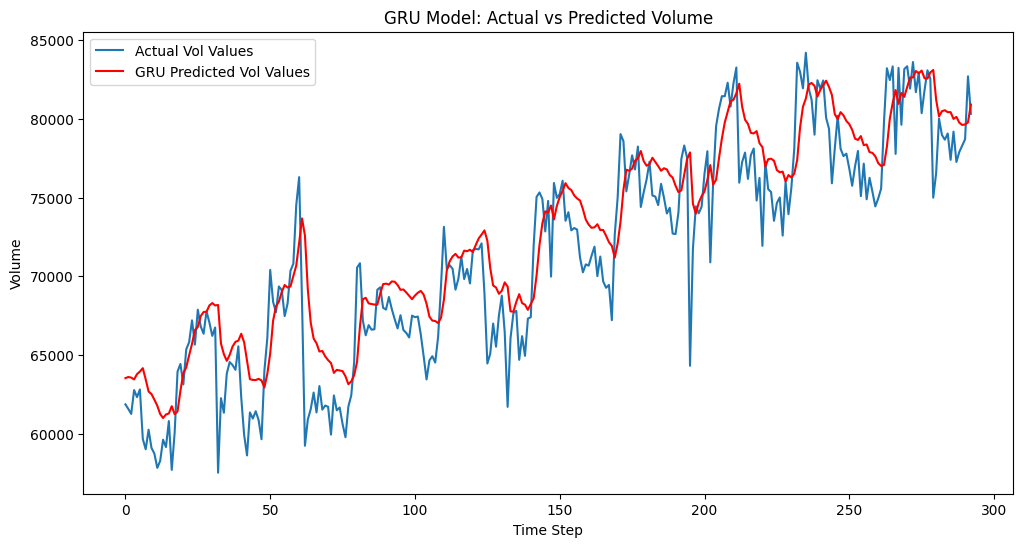

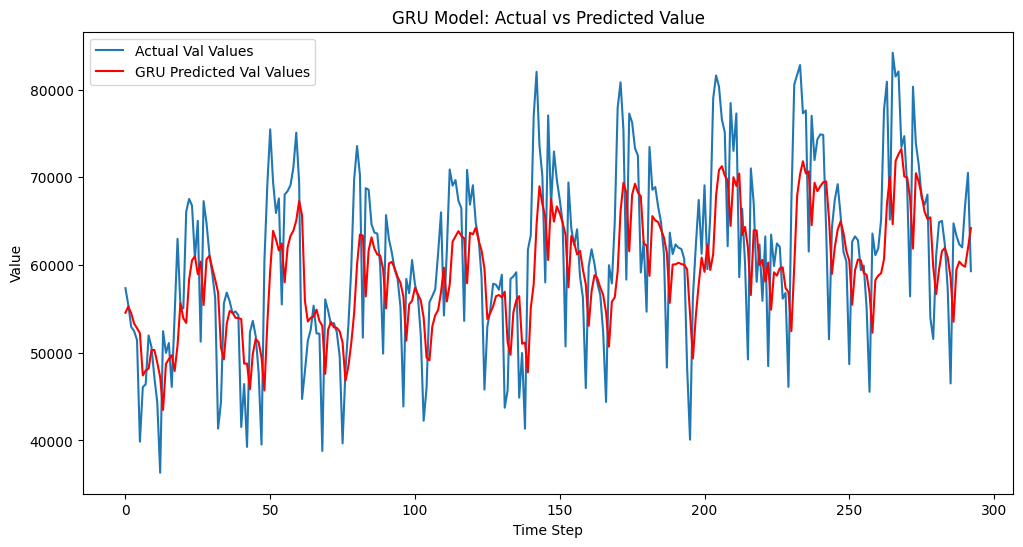

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Calculate MSE, RMSE, and MAE for 'Vol'
mse_vol_gru = mean_squared_error(Y_test_vol_unscaled_gru, gru_predictions_vol_unscaled)
rmse_vol_gru = np.sqrt(mse_vol_gru)
mae_vol_gru = mean_absolute_error(Y_test_vol_unscaled_gru, gru_predictions_vol_unscaled)

print(f"GRU Model Performance for 'Vol':")
print(f"  Mean Squared Error (MSE): {mse_vol_gru:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_vol_gru:.2f}")
print(f"  Mean Absolute Error (MAE): {mae_vol_gru:.2f}")

# Calculate MSE, RMSE, and MAE for 'Val'
mse_val_gru = mean_squared_error(Y_test_val_unscaled_gru, gru_predictions_val_unscaled)
rmse_val_gru = np.sqrt(mse_val_gru)
mae_val_gru = mean_absolute_error(Y_test_val_unscaled_gru, gru_predictions_val_unscaled)

print(f"\nGRU Model Performance for 'Val':")
print(f"  Mean Squared Error (MSE): {mse_val_gru:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_val_gru:.2f}")
print(f"  Mean Absolute Error (MAE): {mae_val_gru:.2f}")

# Plot actual vs predicted values for 'Vol'
plt.figure(figsize=(12, 6))
plt.plot(Y_test_vol_unscaled_gru, label='Actual Vol Values')
plt.plot(gru_predictions_vol_unscaled, label='GRU Predicted Vol Values', color='red')
plt.title('GRU Model: Actual vs Predicted Volume')
plt.xlabel('Time Step')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Plot actual vs predicted values for 'Val'
plt.figure(figsize=(12, 6))
plt.plot(Y_test_val_unscaled_gru, label='Actual Val Values')
plt.plot(gru_predictions_val_unscaled, label='GRU Predicted Val Values', color='red')
plt.title('GRU Model: Actual vs Predicted Value')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()

## Build and Train Vanilla RNN Model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense

# Define the Vanilla RNN model for 'Vol'
model_rnn_vol = Sequential()
model_rnn_vol.add(SimpleRNN(units=50, return_sequences=True, input_shape=(time_step, 1)))
model_rnn_vol.add(Dropout(0.2))
model_rnn_vol.add(SimpleRNN(units=50))
model_rnn_vol.add(Dropout(0.2))
model_rnn_vol.add(Dense(units=1))

# Compile the model for 'Vol'
model_rnn_vol.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for 'Vol'
history_rnn_vol = model_rnn_vol.fit(X_train_vol, Y_train_vol, epochs=50, batch_size=32, validation_data=(X_test_vol, Y_test_vol), verbose=1)

# Define the Vanilla RNN model for 'Val'
model_rnn_val = Sequential()
model_rnn_val.add(SimpleRNN(units=50, return_sequences=True, input_shape=(time_step, 1)))
model_rnn_val.add(Dropout(0.2))
model_rnn_val.add(SimpleRNN(units=50))
model_rnn_val.add(Dropout(0.2))
model_rnn_val.add(Dense(units=1))

# Compile the model for 'Val'
model_rnn_val.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for 'Val'
history_rnn_val = model_rnn_val.fit(X_train_val, Y_train_val, epochs=50, batch_size=32, validation_data=(X_test_val, Y_test_val), verbose=1)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0799 - val_loss: 0.0627
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0208 - val_loss: 0.0172
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0137 - val_loss: 0.0134
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0100 - val_loss: 0.0150
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0079 - val_loss: 0.0082
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0073 - val_loss: 0.0066
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0056 - val_loss: 0.0067
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0041 - val_loss: 0.0090
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0041 - val_loss: 0.0025
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0034 - val_loss: 0.0016
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0

## Make predictions with Vanilla RNN


In [ ]:
# Make predictions on the test set
rnn_predictions_vol = model_rnn_vol.predict(X_test_vol)
rnn_predictions_val = model_rnn_val.predict(X_test_val)

# Invert the scaling for the predictions
rnn_predictions_vol_unscaled = scaler.inverse_transform(rnn_predictions_vol)
rnn_predictions_val_unscaled = scaler.inverse_transform(rnn_predictions_val)

# Invert the scaling for the actual test values
Y_test_vol_unscaled = scaler.inverse_transform(Y_test_vol.reshape(-1, 1))
Y_test_val_unscaled = scaler.inverse_transform(Y_test_val.reshape(-1, 1))

# Print the shapes of the unscaled predictions
print("Shape of unscaled 'Vol' RNN predictions:", rnn_predictions_vol_unscaled.shape)
print("Shape of unscaled 'Val' RNN predictions:", rnn_predictions_val_unscaled.shape)
print("Shape of unscaled 'Vol' actual values:", Y_test_vol_unscaled.shape)
print("Shape of unscaled 'Val' actual values:", Y_test_val_unscaled.shape)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step
Shape of unscaled 'Vol' RNN predictions: (293, 1)
Shape of unscaled 'Val' RNN predictions: (293, 1)
Shape of unscaled 'Vol' actual values: (293, 1)
Shape of unscaled 'Val' actual values: (293, 1)


Vanilla RNN Model Performance for 'Vol':
  Mean Squared Error (MSE): 12411862.38
  Root Mean Squared Error (RMSE): 3523.05
  Mean Absolute Error (MAE): 2913.67

Vanilla RNN Model Performance for 'Val':
  Mean Squared Error (MSE): 25973751.93
  Root Mean Squared Error (RMSE): 5096.45
  Mean Absolute Error (MAE): 3876.14


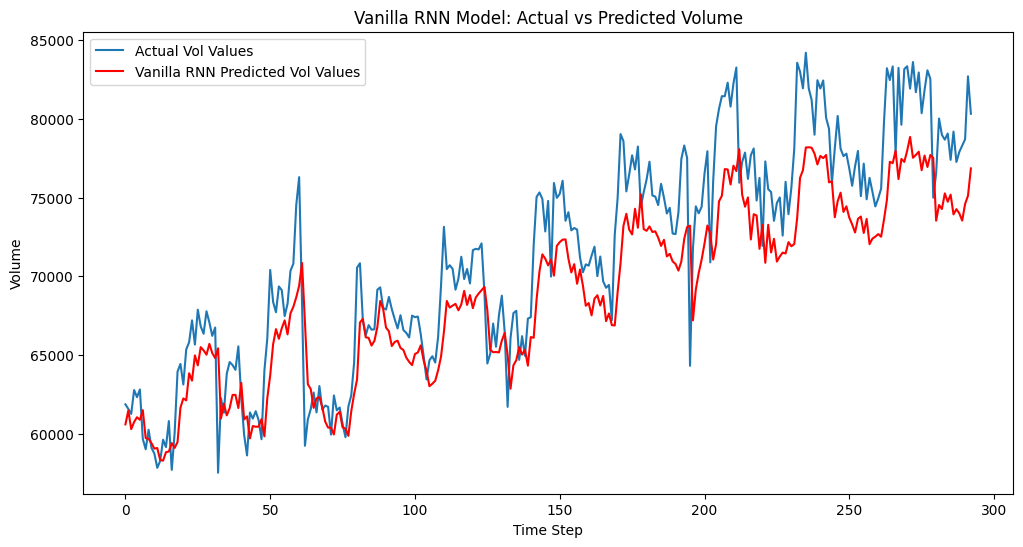

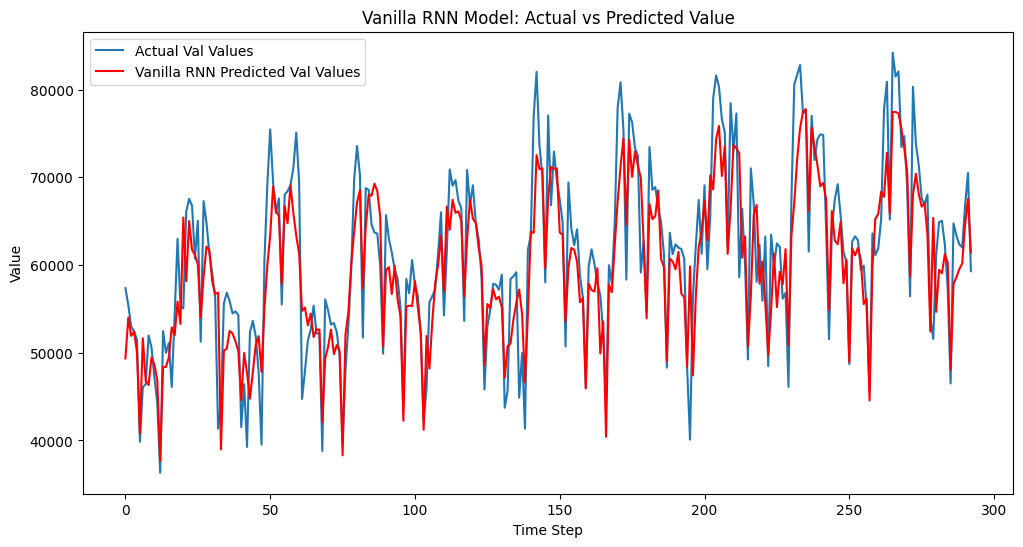

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Calculate MSE, RMSE, and MAE for 'Vol'
mse_vol_rnn = mean_squared_error(Y_test_vol_unscaled, rnn_predictions_vol_unscaled)
rmse_vol_rnn = np.sqrt(mse_vol_rnn)
mae_vol_rnn = mean_absolute_error(Y_test_vol_unscaled, rnn_predictions_vol_unscaled)

print(f"Vanilla RNN Model Performance for 'Vol':")
print(f"  Mean Squared Error (MSE): {mse_vol_rnn:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_vol_rnn:.2f}")
print(f"  Mean Absolute Error (MAE): {mae_vol_rnn:.2f}")

# Calculate MSE, RMSE, and MAE for 'Val'
mse_val_rnn = mean_squared_error(Y_test_val_unscaled, rnn_predictions_val_unscaled)
rmse_val_rnn = np.sqrt(mse_val_rnn)
mae_val_rnn = mean_absolute_error(Y_test_val_unscaled, rnn_predictions_val_unscaled)

print(f"\nVanilla RNN Model Performance for 'Val':")
print(f"  Mean Squared Error (MSE): {mse_val_rnn:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_val_rnn:.2f}")
print(f"  Mean Absolute Error (MAE): {mae_val_rnn:.2f}")

# Plot actual vs predicted values for 'Vol'
plt.figure(figsize=(12, 6))
plt.plot(Y_test_vol_unscaled, label='Actual Vol Values')
plt.plot(rnn_predictions_vol_unscaled, label='Vanilla RNN Predicted Vol Values', color='red')
plt.title('Vanilla RNN Model: Actual vs Predicted Volume')
plt.xlabel('Time Step')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Plot actual vs predicted values for 'Val'
plt.figure(figsize=(12, 6))
plt.plot(Y_test_val_unscaled, label='Actual Val Values')
plt.plot(rnn_predictions_val_unscaled, label='Vanilla RNN Predicted Val Values', color='red')
plt.title('Vanilla RNN Model: Actual vs Predicted Value')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()

## Compare Model Performance



Compare the evaluation metrics (MSE, RMSE, MAE) for the ARIMA, SARIMA, LSTM, and GRU models for both 'Vol' and 'Val' data to determine which model performed best.

In [ ]:
# Print the performance metrics for all models

print("--- Model Performance Comparison ---")

print("\nVolume (Vol) Forecasting:")
print(f"  LSTM:")
print(f"    MSE: {mse_vol:.2f}")
print(f"    RMSE: {rmse_vol:.2f}")
print(f"    MAE: {mae_vol:.2f}")

print(f"\n  GRU:")
print(f"    MSE: {mse_vol_gru:.2f}")
print(f"    RMSE: {rmse_vol_gru:.2f}")
print(f"    MAE: {mae_vol_gru:.2f}")

print(f"\n  Vanilla RNN:")
print(f"    MSE: {mse_vol_rnn:.2f}")
print(f"    RMSE: {rmse_vol_rnn:.2f}")
print(f"    MAE: {mae_vol_rnn:.2f}")


print("\nValue (Val) Forecasting:")
print(f"\n  LSTM:")
print(f"    MSE: {mse_val:.2f}")
print(f"    RMSE: {rmse_val:.2f}")
print(f"    MAE: {mae_val:.2f}")

print(f"\n  GRU:")
print(f"    MSE: {mse_val_gru:.2f}")
print(f"    RMSE: {rmse_val_gru:.2f}")
print(f"    MAE: {mae_val_gru:.2f}")

print(f"\n  Vanilla RNN:")
print(f"    MSE: {mse_val_rnn:.2f}")
print(f"    RMSE: {rmse_val_rnn:.2f}")
print(f"    MAE: {mae_val_rnn:.2f}")

--- Model Performance Comparison ---

Volume (Vol) Forecasting:
  LSTM:
    MSE: 20374123.67
    RMSE: 4513.77
    MAE: 3686.46

  GRU:
    MSE: 9042866.18
    RMSE: 3007.14
    MAE: 2340.17

  Vanilla RNN:
    MSE: 12411862.38
    RMSE: 3523.05
    MAE: 2913.67

Value (Val) Forecasting:

  LSTM:
    MSE: 79061908.91
    RMSE: 8891.68
    MAE: 7718.33

  GRU:
    MSE: 62257571.90
    RMSE: 7890.35
    MAE: 6148.36

  Vanilla RNN:
    MSE: 25973751.93
    RMSE: 5096.45
    MAE: 3876.14


# Final Conclusion and Comparison



**SARIMA – Strength in Seasonality, Weakness in Nonlinear Complexity**

SARIMA is tailored to capture recurring seasonal patterns through its seasonal AR, MA, and differencing components. However, in the case of UPI transactions, it failed to outperform ARIMA because the seasonal patterns were irregular and often influenced by nonlinear, event-driven spikes such as festivals, promotional campaigns, or policy changes. Its assumption of a fixed seasonal period limited its adaptability, and as a linear model, it struggled with sudden, complex variations.

**GRU – The Top Performer for Volume Forecasting**

GRU excelled in capturing both short- and moderately long-term dependencies in the transaction data without the overfitting risk of more complex models like LSTM. Its gating mechanism allowed it to efficiently decide what past information to retain or forget, making it highly responsive to the consistent yet variable temporal patterns in transaction volumes. This balance between adaptability and simplicity made it the best choice for Volume forecasting.

**Vanilla RNN – A Surprise Winner for Value Forecasting**

Despite its simplicity and known limitations, the Vanilla RNN outperformed advanced architectures for Value forecasting. This suggests that Value data may be driven more by short-term dependencies rather than long, complex temporal structures. The smaller, more focused model avoided overfitting to noise and responded quickly to recent trends, highlighting that simpler architectures can be optimal when data patterns are not overly intricate.

**LSTM – Good Trend Capture, But Over-Smoothing**

LSTM successfully modeled long-term trends and some seasonal effects but tended to over-smooth predictions, missing sharper short-term fluctuations. Its complex architecture may have been unnecessary for the dataset’s dependency structure, potentially causing slower adaptation to recent changes. While powerful for data with strong long-term patterns, LSTM’s gating structure can underperform when rapid responsiveness is needed.


This project involved a **comprehensive time series analysis** of UPI transaction data (Volume and Value). We began by exploring the dataset, identifying its key components, and performing exploratory data analysis to understand trends and seasonality. We visualized the data over time, by year, month, and week, revealing clear upward trends and potential seasonal patterns.

To confirm **seasonality**, we employed Fourier Transforms, which strongly indicated a seasonal period of approximately 30 days for both volume and value data. Based on this finding, we decomposed the time series using a multiplicative model to further visualize the trend, seasonality and irregular components.

Recognizing that the data was **non-stationary** (confirmed by the **Augmented Dickey-Fuller test**), we applied a 30-day difference to achieve stationarity. We then used **ACF and PACF plots** of the differenced series to guide the selection of parameters for our forecasting models.

We experimented with both ARIMA and SARIMA models to forecast future UPI transaction volumes and values. While the **ARIMA model captured some of the trend, but it struggled to capture the pronounced seasonality** and the increasing amplitude of the seasonal fluctuations, leading to predictions that were notably flatter than the actual data in the long run. It has underperformed mainly because it can’t directly model seasonality, causing over-differenced data to lose trends and flatten forecasts. The **SARIMA model,on the other hand, incorporating the identified seasonality, provided a better fit and more accurate predictions**, as evidenced by the plots showing actual versus predicted values, because it explicitly models both the non-seasonal and seasonal components of the time series.

Finally, we performed rigorous **residual analysis** on the SARIMA models. Plots of residuals and standardized residuals, along with ACF/PACF plots of residuals, the **Ljung-Box test**, distribution plots, and Q-Q plots, allowed us to assess the model's goodness of fit and determine if the residuals were independently and normally distributed. The **residual analysis confirmed that the SARIMA model provided a reasonable representation of the underlying data generating process**.

Overall, this project successfully demonstrated the application of time series analysis techniques to real-world financial data. **The SARIMA models developed offer a valuable tool for forecasting future UPI transaction activity, which could be beneficial for various purposes, such as capacity planning, risk assessment, and strategic decision-making**. Future work could involve exploring other time series models, incorporating external factors, or further refining model parameters to potentially improve forecasting accuracy.